In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np
import pickle

import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")

from c_utree_boost import Agent_boost_Galen_action_numpy as Agent
from c_utree_boost import Problem

Instructions for updating:
non-resource variables are not supported in the long term


In [10]:
estimator = "DR"
competition = "L"
agent_num = 3
special = "high_var"

# Normal Data

In [7]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS_highVAR.json')

In [8]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  24%|██▍       | 3975/16384 [00:01<00:06, 2053.39it/s]
The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)


Stopping at Epoch 3975



DR 1: 100%|██████████| 32768/32768 [00:10<00:00, 3175.57it/s]


AUC predicting P(win):				 0.6116508171120761
Estimated Utility	 Mean Error:			 0.304025984711554
Estimated Utility	 Mean Absolute Error:	 0.3266869304695144



Initialising Policy: 100%|██████████| 16384/16384 [00:20<00:00, 794.21it/s]


Predicted mu Gammas:  tensor(0.9981, grad_fn=<MinBackward1>) tensor(1.0012, grad_fn=<MaxBackward1>) tensor(1.0001, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0574, grad_fn=<MinBackward1>) tensor(0.0999, grad_fn=<MaxBackward1>) tensor(0.0639, grad_fn=<MeanBackward0>)



DR 1:  19%|█▉        | 6274/32768 [00:18<01:19, 335.11it/s]


Stopping at Epoch 6274
DR 1 Number of samples:  torch.Size([6673, 2])
DR 1 Predicted Gammas:  0.6753111 0.8368193 0.7400012
agent: 1




DR 2:  20%|█▉        | 3222/16384 [00:02<00:09, 1407.01it/s]


Stopping at Epoch 3222



DR 2:  82%|████████▏ | 26893/32768 [00:10<00:02, 2262.55it/s]

Epoch 26474: reducing learning rate of group 0 to 6.0000e-04.
Epoch 26742: reducing learning rate of group 0 to 1.2000e-04.



DR 2:  84%|████████▎ | 27379/32768 [00:10<00:02, 2177.97it/s]

Epoch 26999: reducing learning rate of group 0 to 2.4000e-05.
Epoch 27256: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  85%|████████▌ | 27881/32768 [00:11<00:01, 2523.30it/s]


Epoch 27513: reducing learning rate of group 0 to 9.6000e-07.
Epoch 27770: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 27881
AUC predicting P(win):				 0.8356004741033511
Estimated Utility	 Mean Error:			 0.3761138995633727
Estimated Utility	 Mean Absolute Error:	 0.41265873203387815



Initialising Policy:  85%|████████▍ | 13865/16384 [00:16<00:02, 846.21it/s]


Stopping at Epoch 13865
Predicted mu Gammas:  tensor(0.9974, grad_fn=<MinBackward1>) tensor(1.0081, grad_fn=<MaxBackward1>) tensor(1.0000, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0435, grad_fn=<MinBackward1>) tensor(0.0833, grad_fn=<MaxBackward1>) tensor(0.0504, grad_fn=<MeanBackward0>)



DR 2:  38%|███▊      | 12411/32768 [00:31<00:51, 395.28it/s]


Stopping at Epoch 12411
DR 2 Number of samples:  torch.Size([6689, 2])
DR 2 Predicted Gammas:  0.70803785 1.0 0.7936786
agent: 2




DR 3:  16%|█▌        | 2593/16384 [00:02<00:12, 1096.30it/s]


Stopping at Epoch 2593



DR 3: 100%|██████████| 32768/32768 [00:10<00:00, 3106.59it/s]


AUC predicting P(win):				 0.94898922262248
Estimated Utility	 Mean Error:			 0.5311160840086668
Estimated Utility	 Mean Absolute Error:	 0.5629305292573356



Initialising Policy: 100%|██████████| 16384/16384 [00:18<00:00, 878.87it/s]


Predicted mu Gammas:  tensor(0.9959, grad_fn=<MinBackward1>) tensor(1.0025, grad_fn=<MaxBackward1>) tensor(0.9994, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0433, grad_fn=<MinBackward1>) tensor(0.0738, grad_fn=<MaxBackward1>) tensor(0.0501, grad_fn=<MeanBackward0>)



DR 3:  22%|██▏       | 7063/32768 [00:17<01:04, 399.45it/s]


Stopping at Epoch 7063
DR 3 Number of samples:  torch.Size([6638, 2])
DR 3 Predicted Gammas:  0.6397699 1.0 0.76101786
number of iteration: 1

agent: 0




DR 1:  17%|█▋        | 2736/16384 [00:00<00:04, 3009.93it/s]


Stopping at Epoch 2736
AUC predicting P(win):				 0.5610146790390834
Estimated Utility	 Mean Error:			 -0.015596938671126234
Estimated Utility	 Mean Absolute Error:	 0.12849368966183747



DR 1:  54%|█████▍    | 17676/32768 [00:05<00:04, 3344.19it/s]

Epoch 17165: reducing learning rate of group 0 to 6.0000e-04.
Epoch 17450: reducing learning rate of group 0 to 1.2000e-04.
Epoch 17707: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  56%|█████▌    | 18334/32768 [00:05<00:04, 3159.13it/s]

Epoch 17964: reducing learning rate of group 0 to 4.8000e-06.
Epoch 18221: reducing learning rate of group 0 to 9.6000e-07.
Epoch 18478: reducing learning rate of group 0 to 1.9200e-07.



DR 1:  57%|█████▋    | 18744/32768 [00:05<00:04, 3183.75it/s]


Epoch 18735: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 18744
AUC predicting P(win):				 0.6383007295500032
Estimated Utility	 Mean Error:			 0.014489831731304782
Estimated Utility	 Mean Absolute Error:	 0.14013443514322318



DR 1:   3%|▎         | 1032/32768 [00:03<01:43, 307.24it/s]


Stopping at Epoch 1032
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.6028279 0.84924775 0.7646937
agent: 1




DR 2:   8%|▊         | 1322/16384 [00:00<00:09, 1662.07it/s]


Stopping at Epoch 1322
AUC predicting P(win):				 0.8225559312656299
Estimated Utility	 Mean Error:			 -0.09453787027237653
Estimated Utility	 Mean Absolute Error:	 0.2038019949984618



DR 2: 100%|██████████| 32768/32768 [00:10<00:00, 3091.11it/s]


AUC predicting P(win):				 0.833069736222872
Estimated Utility	 Mean Error:			 0.014751749981689303
Estimated Utility	 Mean Absolute Error:	 0.15612986963671166



DR 2:   2%|▏         | 737/32768 [00:01<01:19, 402.52it/s]


Stopping at Epoch 737
DR 2 Number of samples:  torch.Size([6721, 2])
DR 2 Predicted Gammas:  0.72899985 1.0 0.8450053
agent: 2




DR 3:  17%|█▋        | 2771/16384 [00:01<00:06, 2152.26it/s]


Stopping at Epoch 2771
AUC predicting P(win):				 0.7757540914937973
Estimated Utility	 Mean Error:			 -0.09147042706447181
Estimated Utility	 Mean Absolute Error:	 0.2816104303326273



DR 3:  42%|████▏     | 13807/32768 [00:04<00:06, 3151.43it/s]

Epoch 13319: reducing learning rate of group 0 to 6.0000e-04.
Epoch 13629: reducing learning rate of group 0 to 1.2000e-04.
Epoch 13886: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  44%|████▍     | 14514/32768 [00:04<00:05, 3348.83it/s]

Epoch 14143: reducing learning rate of group 0 to 4.8000e-06.
Epoch 14400: reducing learning rate of group 0 to 9.6000e-07.
Epoch 14657: reducing learning rate of group 0 to 1.9200e-07.



DR 3:  45%|████▌     | 14898/32768 [00:04<00:05, 3247.13it/s]


Stopping at Epoch 14898
AUC predicting P(win):				 0.8352096178969897
Estimated Utility	 Mean Error:			 0.024029530593032082
Estimated Utility	 Mean Absolute Error:	 0.23325393022802612



DR 3:   3%|▎         | 873/32768 [00:02<01:18, 406.54it/s]


Stopping at Epoch 873
DR 3 Number of samples:  torch.Size([6608, 2])
DR 3 Predicted Gammas:  0.5951834 1.0 0.75020564
number of iteration: 2

agent: 0




DR 1:  11%|█         | 1826/16384 [00:01<00:09, 1504.08it/s]


Stopping at Epoch 1826
AUC predicting P(win):				 0.7214021065409326
Estimated Utility	 Mean Error:			 -0.0032556865530888163
Estimated Utility	 Mean Absolute Error:	 0.14748845037166677



DR 1:  48%|████▊     | 15811/32768 [00:05<00:05, 3119.53it/s]

Epoch 15243: reducing learning rate of group 0 to 6.0000e-04.
Epoch 15529: reducing learning rate of group 0 to 1.2000e-04.
Epoch 15786: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  50%|█████     | 16440/32768 [00:05<00:05, 3105.75it/s]

Epoch 16043: reducing learning rate of group 0 to 4.8000e-06.
Epoch 16300: reducing learning rate of group 0 to 9.6000e-07.
Epoch 16557: reducing learning rate of group 0 to 1.9200e-07.


DR 1:  51%|█████     | 16708/32768 [00:05<00:05, 3055.67it/s]


Stopping at Epoch 16708
AUC predicting P(win):				 0.7262017373010359
Estimated Utility	 Mean Error:			 0.013812809226259685
Estimated Utility	 Mean Absolute Error:	 0.1461508860224542



DR 1:  19%|█▉        | 6241/32768 [00:16<01:09, 379.17it/s]


Stopping at Epoch 6241
DR 1 Number of samples:  torch.Size([6657, 2])
DR 1 Predicted Gammas:  0.68928075 1.0 0.8034638
agent: 1




DR 2:   7%|▋         | 1067/16384 [00:00<00:07, 2127.42it/s][A


Stopping at Epoch 1067
AUC predicting P(win):				 0.9481082347365524
Estimated Utility	 Mean Error:			 -0.009701937869343244
Estimated Utility	 Mean Absolute Error:	 0.15833145432354315



DR 2:  82%|████████▏ | 26882/32768 [00:08<00:01, 3357.29it/s]

Epoch 26353: reducing learning rate of group 0 to 6.0000e-04.
Epoch 26624: reducing learning rate of group 0 to 1.2000e-04.
Epoch 26881: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  84%|████████▍ | 27549/32768 [00:08<00:01, 3297.54it/s]

Epoch 27138: reducing learning rate of group 0 to 4.8000e-06.
Epoch 27395: reducing learning rate of group 0 to 9.6000e-07.
Epoch 27652: reducing learning rate of group 0 to 1.9200e-07.


DR 2:  85%|████████▍ | 27828/32768 [00:08<00:01, 3272.42it/s]


Stopping at Epoch 27828
AUC predicting P(win):				 0.9527910548217777
Estimated Utility	 Mean Error:			 0.011326004860237783
Estimated Utility	 Mean Absolute Error:	 0.13717963803173225



DR 2:   6%|▌         | 1923/32768 [00:04<01:10, 440.49it/s]


Stopping at Epoch 1923
DR 2 Number of samples:  torch.Size([6607, 2])
DR 2 Predicted Gammas:  0.55793804 1.0 0.7289814
agent: 2




DR 3:   7%|▋         | 1077/16384 [00:00<00:06, 2268.93it/s]


Stopping at Epoch 1077
AUC predicting P(win):				 0.642009894165817
Estimated Utility	 Mean Error:			 0.07322435062645152
Estimated Utility	 Mean Absolute Error:	 0.2409622063007677



DR 3:  22%|██▏       | 7183/32768 [00:02<00:12, 2065.33it/s]

Epoch 06782: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07061: reducing learning rate of group 0 to 1.2000e-04.



DR 3:  24%|██▍       | 7787/32768 [00:02<00:09, 2507.22it/s]

Epoch 07318: reducing learning rate of group 0 to 2.4000e-05.
Epoch 07575: reducing learning rate of group 0 to 4.8000e-06.
Epoch 07832: reducing learning rate of group 0 to 9.6000e-07.



DR 3:  26%|██▌       | 8514/32768 [00:03<00:09, 2648.99it/s]


Epoch 08089: reducing learning rate of group 0 to 1.9200e-07.
Epoch 08346: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 8514
AUC predicting P(win):				 0.6432863951202353
Estimated Utility	 Mean Error:			 0.001870780300885445
Estimated Utility	 Mean Absolute Error:	 0.23283612747181248



DR 3:   1%|          | 192/32768 [00:00<01:46, 306.75it/s]

Epoch 00156: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 306/32768 [00:00<01:32, 349.61it/s]

Epoch 00257: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|▏         | 420/32768 [00:01<01:27, 368.84it/s]

Epoch 00358: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   2%|▏         | 493/32768 [00:01<01:37, 331.89it/s]


Epoch 00459: reducing learning rate of group 0 to 1.1200e-05.


DR 3:   2%|▏         | 567/32768 [00:01<01:38, 327.99it/s]


Epoch 00560: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 567
DR 3 Number of samples:  torch.Size([6736, 2])
DR 3 Predicted Gammas:  0.6438594 1.0 0.76679075


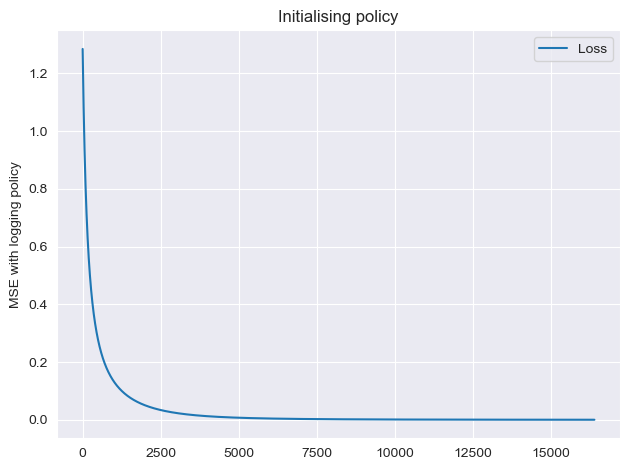

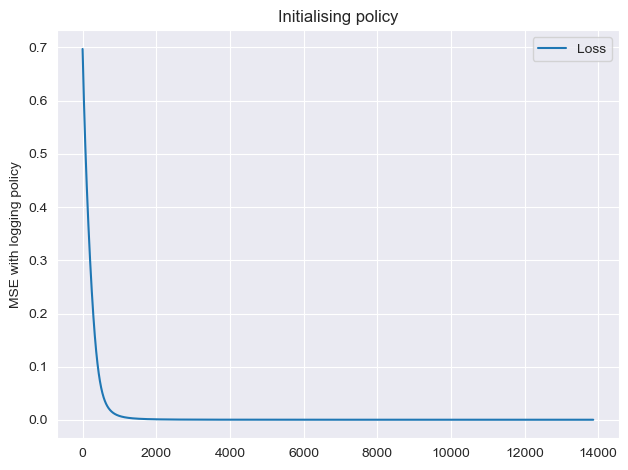

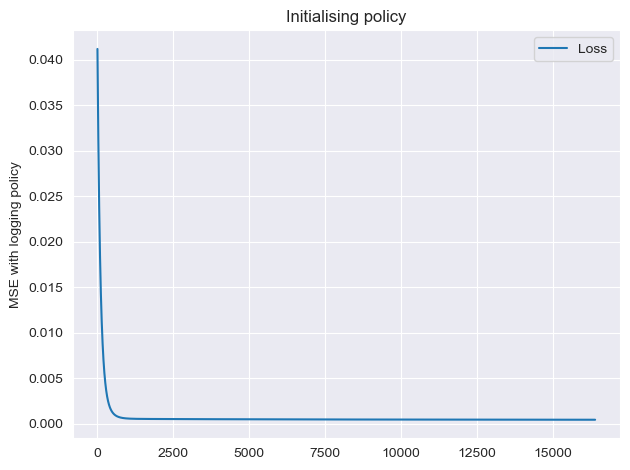

In [9]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

# Save Auction

In [11]:
pickle.dump(auction, open(f'DR_L_auction_{special}.pickle', 'wb'))

In [12]:
auction = pickle.load(open(f'DR_L_auction_{special}.pickle', 'rb'))

# data generation

In [13]:
# data generation
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'val': {}, 'test':{}}


num_data = [80000, 10000, 10000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

# Save Data

In [14]:
data_dir = f"../data_{estimator}_{competition}_{special}/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [17]:
# import split_data
# import importlib
# importlib.reload(split_data)

from split_data import split_data

In [18]:
# split_data
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        split_data(estimator=estimator, competition=competition, data_set=data_set, agent_num=str(agent_id), row_num=1000, data_dir=f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', special=f'_{special}')

# Read data

In [19]:
offline_data_key = {'context': 0, 'estimated_CTR': 5, 'value': 6, 'bid': 7, 'gamma': 8, 'true_CTR': 9, 'price': 10, 'second_price': 11, 'won_mask': 12, 'outcome': 13, 'utility': 14}

In [20]:
def read_csv_game_record_auction(csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [5]:
offline_data = {'train': {}, 'val': {},'test': {}}
for agent_id in range(agent_num):
    offline_data['train'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/train_{agent_id}.csv")
    offline_data['val'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/val_{agent_id}.csv")
    offline_data['test'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/test_{agent_id}.csv")

# CUTree

In [50]:
problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=2, split_size=1000,games_directory="../data_DR_H_split_1000/train/")

# disable the max_hist
CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=3000, training_mode='')

max_hist 3000


In [8]:
#for agent_id in offline_data['train'].keys():
agent_id = 0
for max_depth in [5, 10, 20, 30]:
    for min_split_int in [2, 4, 10, 15]:
        problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000,games_directory="../data_DR_L_split_1000/train/")

        CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000, training_mode='')
        print("Agent", agent_id)
        print("Max Depth", max_depth)
        print("Min Split Instances", min_split_int)
        input_train_data = offline_data['train'][agent_id][:, :5]
        label_train_data = offline_data['train'][agent_id][:, 7]

        input_val_data = offline_data['val'][agent_id][:, :5]
        label_val_data = offline_data['val'][agent_id][:, 7]

        train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/', read_game_number=54, data_set='train')
        val_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/', read_game_number=54, data_set='val')
        print("Train R2 score:", r2_score(label_train_data, train_preds))
        print("Val R2 score:", r2_score(label_val_data, val_preds))
        print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
        print("Val MSE: ", mean_squared_error(label_val_data, val_preds))

Agent 0
Max Depth 5
Min Split Instances 2
<ipykernel.iostream.OutStream object at 0x107967b50> starting from 54
<ipykernel.iostream.OutStream object at 0x107967b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x107967b50> starting from 54
<ipykernel.iostream.OutStream object at 0x107967b50> finishing read tree
Train R2 score: 0.6094718209238534
Val R2 score: 0.6063320574811151
Train MSE:  0.030696126603756882
Val MSE:  0.03160818129066269
Agent 0
Max Depth 5
Min Split Instances 4
<ipykernel.iostream.OutStream object at 0x107967b50> starting from 54
<ipykernel.iostream.OutStream object at 0x107967b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x107967b50> starting from 54
<ipykernel.iostream.OutStream object at 0x107967b50> finishing read tree
Train R2 score: 0.609579824289559
Val R2 score: 0.6063201929111421
Train MSE:  0.030687637370034555
Val MSE:  0.031609133914532045
Agent 0
Max Depth 5
Min Split Instances 10
<ipykernel.iostream.OutStream object at

In [58]:
train_preds_CUTree_1000= CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_H/agent_0/model_boost_linear_qsplit_noabs_save_split_1000_3000/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_H/', read_game_number=53, data_set='train')

<ipykernel.iostream.OutStream object at 0x107be7c40> starting from 53
<ipykernel.iostream.OutStream object at 0x107be7c40> finishing read tree


In [34]:
test_preds_CUTree_1000= CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_H/agent_2/model_boost_linear_qsplit_noabs_save_split_1000_3000/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_H/', read_game_number=53, data_set='test')

<ipykernel.iostream.OutStream object at 0x107be7c40> starting from 53
<ipykernel.iostream.OutStream object at 0x107be7c40> finishing read tree


In [38]:
print("Train MSE: ", mean_squared_error(offline_data['train'][2][:, 7], train_preds_CUTree_1000))
print("Test MSE: ", mean_squared_error(offline_data['test'][2][:, 7], test_preds_CUTree_1000))
print("Train R2", r2_score(offline_data['train'][2][:, 7], train_preds_CUTree_1000))
print("Test R2", r2_score(offline_data['test'][2][:, 7], test_preds_CUTree_1000))

Train MSE:  0.0018965843856246472
Test MSE:  0.001954897140573292
Train R2 0.2662253759843558
Test R2 0.26324481410297074


# M5 Tree

In [31]:
from m5py import M5Prime, export_text_m5

In [14]:
# model = M5Prime(use_smoothing=True, use_pruning=False)
# for agent_id in offline_data['train'].keys():
#     input_train_data = offline_data['train'][agent_id][:, :5]
#     label_train_data = offline_data['train'][agent_id][:, 7]
#     print("Agent", agent_id)
#     best_estimator = model.fit(input_train_data, label_train_data)
#     input_test_data = offline_data['test'][agent_id][:, :5]
#     label_test_data = offline_data['test'][agent_id][:, 7]
#
#     train_preds = best_estimator.predict(input_train_data)
#     test_preds = best_estimator.predict(input_test_data)
#     print("Train R2 score:", r2_score(label_train_data, train_preds))
#     print("Test R2 score:", r2_score(label_test_data, test_preds))
#     print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
#     print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

In [33]:
param_grid = {
    #first
    'max_depth': [ 5, 10, 25, 50],
    'min_samples_split': [2, 4, 10, 20, 50, 100]
    # second
    # 'max_depth': [ 5, 10, 20, 30, 40, 50 ],
    # 'min_samples_split': [2, 4, 10, 15, 20, 30, 50, 75, 100]
}

In [34]:
def gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data):
    best_params_ = None
    best_score_ = 0
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            model = model_class(max_depth= max_depth, min_samples_split=min_samples_split, random_state=0)
            model.fit(input_train_data, label_train_data)
            score = model.score(input_val_data, label_val_data)
            if score > best_score_:
                best_params_ = {'max_depth': max_depth, 'min_samples_split': min_samples_split}
                best_score_ = score


    print("Param for GS", best_params_)
    print("R2 score for GS", best_score_)
    best_model = model_class(**best_params_)
    return best_model

In [35]:
model_class = M5Prime
# without smoothing
context_bid_estimators_M5Tree = {}
# context with bid
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    input_val_data = offline_data['val'][agent_id][:, :5]
    label_val_data = offline_data['val'][agent_id][:, 7]
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_M5Tree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 50, 'min_samples_split': 2}
R2 score for GS 0.6834059032362
Test R2 score: 0.6867281205939232
Train MSE:  0.005044116018295973
Test MSE:  0.007185336235806075
Agent 1
Param for GS {'max_depth': 25, 'min_samples_split': 10}
R2 score for GS 0.7072689069354037
Test R2 score: 0.676047075454764
Train MSE:  0.006002729165151022
Test MSE:  0.008837997606909167
Agent 2
Param for GS {'max_depth': 50, 'min_samples_split': 2}
R2 score for GS 0.8745859821708161
Test R2 score: 0.8660622695759991
Train MSE:  0.00044063345858822627
Test MSE:  0.0006120824583134247


In [29]:
# context with bid
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    input_val_data = offline_data['val'][agent_id][:, :5]
    label_val_data = offline_data['val'][agent_id][:, 7]
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_rTree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 20, 'min_samples_split': 100}
R2 score for GS 0.5954181892526393
Test R2 score: 0.6061344129449124
Train MSE:  0.006720336130879682
Test MSE:  0.009033867578760586
Agent 1
Param for GS {'max_depth': 20, 'min_samples_split': 75}
R2 score for GS 0.6190967241427344
Test R2 score: 0.6005310559054906
Train MSE:  0.006713947202205282
Test MSE:  0.010898205586191007
Agent 2
Param for GS {'max_depth': 20, 'min_samples_split': 15}
R2 score for GS 0.8308574957807807
Test R2 score: 0.8211444261862018
Train MSE:  0.00035296507795452506
Test MSE:  0.0008173526530309983


In [25]:
offline_data['train'][2][:, 7].std()

0.06731641454531978

In [24]:
offline_data['train'][0][:, 7].std()

0.15162827522929714

In [41]:
# If the rng record is cleared, use this
rng = np.random.default_rng(0)

In [42]:
# This is for single agent get replaced by surrogate model
for agent_id in offline_data['train'].keys():
    surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
    data_set = 'test'
    surrogate_agent_id = agent_id
    surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :5])
    context_num = 5
    for i in range(len(offline_data[data_set][surrogate_agent_id])):
        # win_mask
        if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                surrogate_logs['won_mask'].append(True)
                surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
        else:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                surrogate_logs['won_mask'].append(True)
                # This creates randomness in the surrogate model
                outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                surrogate_logs['outcomes'].append(outcome)
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

    surrogate_won_mask = np.array(surrogate_logs['won_mask'])
    surrogate_outcomes = np.array(surrogate_logs['outcomes'])
    surrogate_prices = np.array(surrogate_logs['prices'])
    surrogate_utilities = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
    surrogate_utilities[surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
    print(f"Agent: {agent_id}")
    print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
    print(f"Surrogate utility: {surrogate_utilities.mean()}" )
    print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities)}")

Agent: 0
Original utility: 0.004906677055637212
Surrogate utility: 0.005488817879097059
R2 score: 0.8630118454135507
Agent: 1
Original utility: 0.047288165889720034
Surrogate utility: 0.0436259102955381
R2 score: 0.8579546731914592
Agent: 2
Original utility: 0.03137086689375815
Surrogate utility: 0.03045715435526283
R2 score: 0.9170638279535878


<AxesSubplot:>

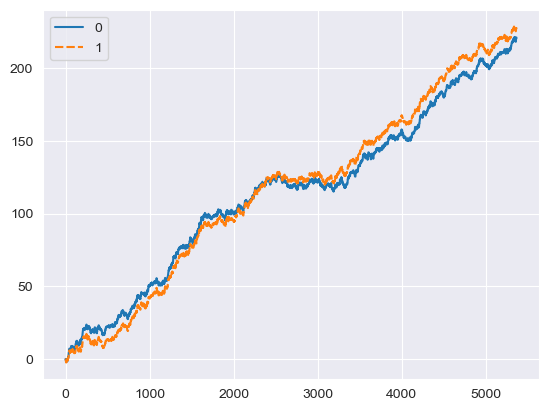

In [245]:
sns.lineplot(data=[surrogate_utilities.cumsum(), offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].cumsum()])

In [316]:
# TODO: add label to features

In [304]:
explainer = shap.TreeExplainer(context_bid_estimators[0])

In [319]:
shap_values = explainer.shap_values(offline_data['test'][0][:, :5])
# naturally, the constant/ bias term in context doesnt have any effect on the prediction

In [320]:
offline_data['test'][0][:, :5].shape

(5320, 5)

In [321]:
shap_values.shape

(5320, 5)

In [317]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], offline_data['test'][0][:200, :5])

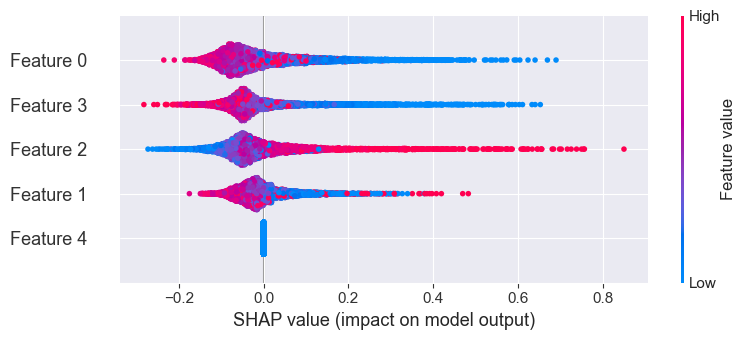

In [322]:
shap.summary_plot(shap_values, offline_data['test'][0][:, :5])

In [207]:
# # This is for single agent get replaced by surrogate model
#
# surrogate_model = None
# data_set = 'test'
# surrogate_agent_id = 0
# surrogate_bid = test_preds
# j = 0
# for i in range(len(participating_agents_logs[data_set])):
#     bids = []
#     CTRs = []
#     if surrogate_agent_id in participating_agents_logs[data_set][i]:
#         for agent_id in offline_data[data_set].keys():
#             if agent_id == surrogate_agent_id:
#                 bids.append(test_preds[j])
#                 j+=1
#             else:
#                 bids.append(offline_data[data_set][agent_id][j, 7])
#             CTRs.append(offline_data[data_set][agent_id][j, 9])
#         bids = np.array(bids)
#         CTRs = np.array(CTRs)
#         winners = np.argsort(-bids)[:1]
#         outcomes = rng.binomial(1, CTRs[winners])
#         # currently only consider one winner
#         if surrogate_agent_id == winners:
#             surrogate_logs['outcomes'].append(outcomes)
#             surrogate_logs['won_mask'].append(1)
#         else:
#             surrogate_logs['outcomes'].append(0)
#             surrogate_logs['won_mask'].append(0)
#         surrogate_logs['prices'].append(bids[winners])
#     else:
#         pass

In [83]:
# context with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.7276250965125122
Test R2 score: 0.7416675628006455
Train MSE:  0.00022022459909153483
Test MSE:  0.00027168110604471903
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.4048234159067919
Test R2 score: 0.39205196499514683
Train MSE:  0.00013023620239745016
Test MSE:  0.0001698578591254831
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [210]:
# estimated_CTR and value with bid
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.9994057387395154
Test R2 score: 0.9993624406666591
Train MSE:  2.1039844916142337e-05
Test MSE:  3.602544011977278e-05
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9999547836211953
Test R2 score: 0.9999626617457903
Train MSE:  4.217735241951066e-07
Test MSE:  2.1888072122472528e-06
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.9993136801654782
Test R2 score: 0.9993091525895826
Train MSE:  2.3764045696378117e-05
Test MSE:  2.8988811842495896e-05


In [85]:
# estimated_CTR and value with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.9069516511333034
Test R2 score: 0.9079438564449289
Train MSE:  9.46583991692418e-05
Test MSE:  9.681290963841697e-05
Agent 1
Param for GS {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.6273128939537818
Test R2 score: 0.6142501426573515
Train MSE:  9.935543498714107e-05
Test MSE:  0.00010777671964292107
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [237]:
x = context_bid_estimators[0]

In [223]:
x([2, 3])

TypeError: 'DecisionTreeRegressor' object is not callable

In [240]:
float(x.predict(np.array([1, 2, 3, 2, 3]).reshape(-1, 5)))

0.7775402386708143

In [241]:
len(np.array([1, 2, 3, 2, 3]))

5

In [243]:
np.argmax(np.array([1, 2, 3, 2, 3]))

2